In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("House_specifications.csv")

In [4]:
df.head()

,Id,ClassOfMSSsub,Zoningof MS,LotFrontage,LotOFArea,Street,Alley,LotOFShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
miss = df.isnull().sum()
miss

Id                 0
ClassOfMSSsub      0
Zoningof MS        0
LotFrontage      259
LotOFArea          0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
miss = miss[miss > 0]

In [9]:
df.shape

(1460, 81)

In [8]:
miss

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
#EDA() 

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [12]:
categorical_cols

Index(['Zoningof MS', 'Street', 'Alley', 'LotOFShape', 'LandContour',
       'Utilities', 'LotOFConfig', 'SlopeOFland', 'Neighbor', 'firstCondition',
       'secondCondition', 'TypeofBLDG', 'StyleOFhouse', 'Styleofroof',
       'RoofofMatl', 'Exteriorfirst', 'Exteriorsecond', 'MasVnrType',
       'ExterQualifaction', 'ExterCondition', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



correlation_matrix = df_encoded.corr()

In [17]:
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending = False)

In [18]:
saleprice_correlation.head(20)

SalePrice               1.000000
OverallQualification    0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
Builtdate               0.522897
YearRemodAdd            0.507101
Foundation_PConc        0.497734
GarageYrBlt             0.486362
MasVnrArea              0.477493
Fireplaces              0.466929
ExterQualifaction_Gd    0.452466
BsmtFinType1_GLQ        0.434597
Neighbor_NridgHt        0.402149
BsmtFinSF1              0.386420
SaleType_New            0.357509
Name: SalePrice, dtype: float64

In [19]:
saleprice_correlation.tail(20)

Exteriorfirst_Wd Sdng    -0.158619
Exteriorsecond_Wd Sdng   -0.161800
Exteriorsecond_MetalSd   -0.162389
Neighbor_IDOTRR          -0.164056
Exteriorfirst_MetalSd    -0.167068
Neighbor_Edwards         -0.179949
Neighbor_NAmes           -0.188513
Neighbor_OldTown         -0.192189
Styleofroof_Gable        -0.224744
SaleType_WD              -0.242598
BsmtExposure_No          -0.263600
LotOFShape_Reg           -0.267672
Zoningof MS_RM           -0.288065
HeatingQC_TA             -0.312677
Foundation_CBlock        -0.343263
GarageType_Detchd        -0.354141
GarageFinish_Unf         -0.410608
BsmtQual_TA              -0.452394
KitchenQual_TA           -0.519298
ExterQualifaction_TA     -0.589044
Name: SalePrice, dtype: float64

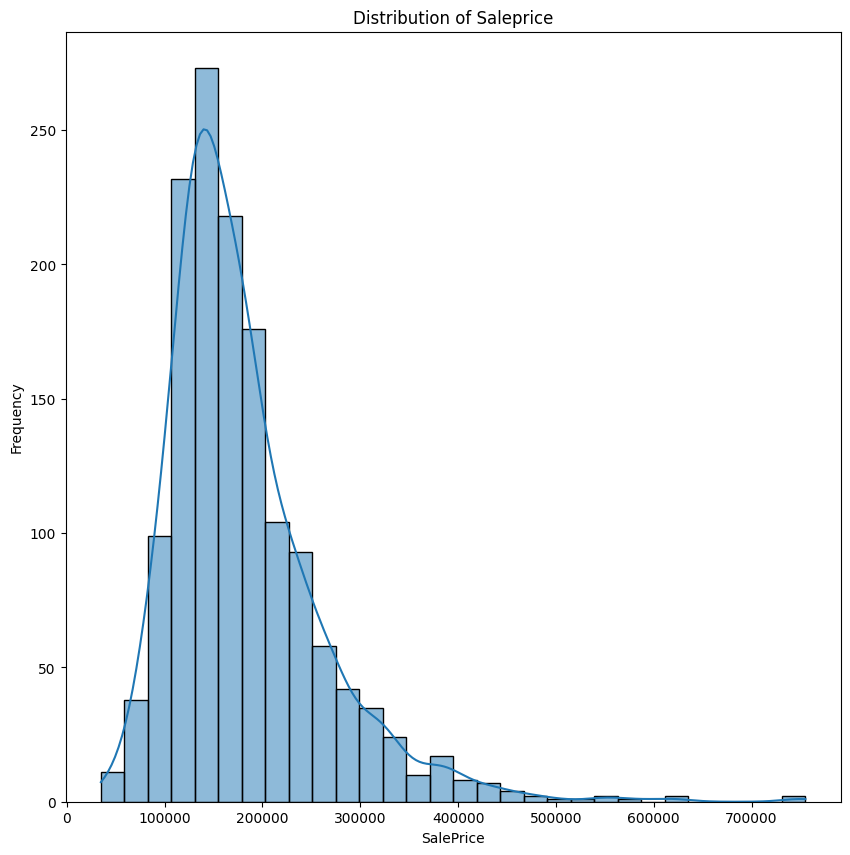

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(df['SalePrice'], kde = True, bins = 30)
plt.title('Distribution of Saleprice')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Above grade living area')

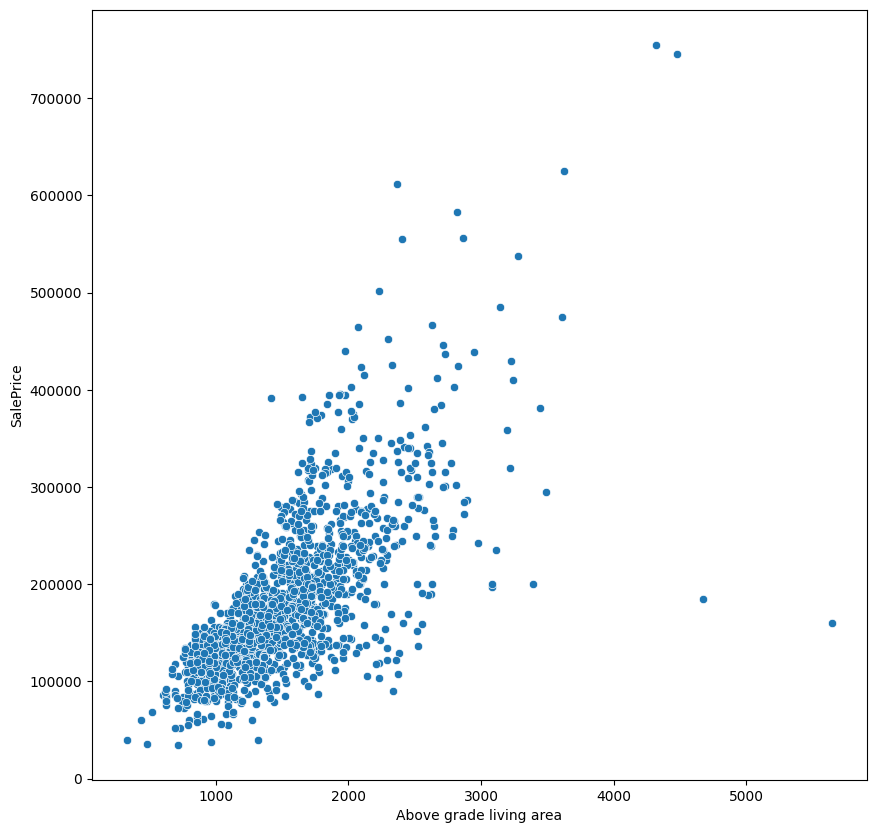

In [22]:
plt.figure(figsize = (10,10))
sns.scatterplot(x= 'GrLivArea', y = 'SalePrice' , data = df)
plt.ylabel('SalePrice')
plt.xlabel('Above grade living area')

In [23]:
df['HouseAge'] = df['YrSold'] - df['Builtdate']

df.drop(['Builtdate', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_encoded.drop('SalePrice', axis=1) # independent 
y = df['SalePrice'] # target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 17601.93681506849
Mean Squared Error (MSE): 805396687.121951
R-squared (R2): 0.8949983787694334


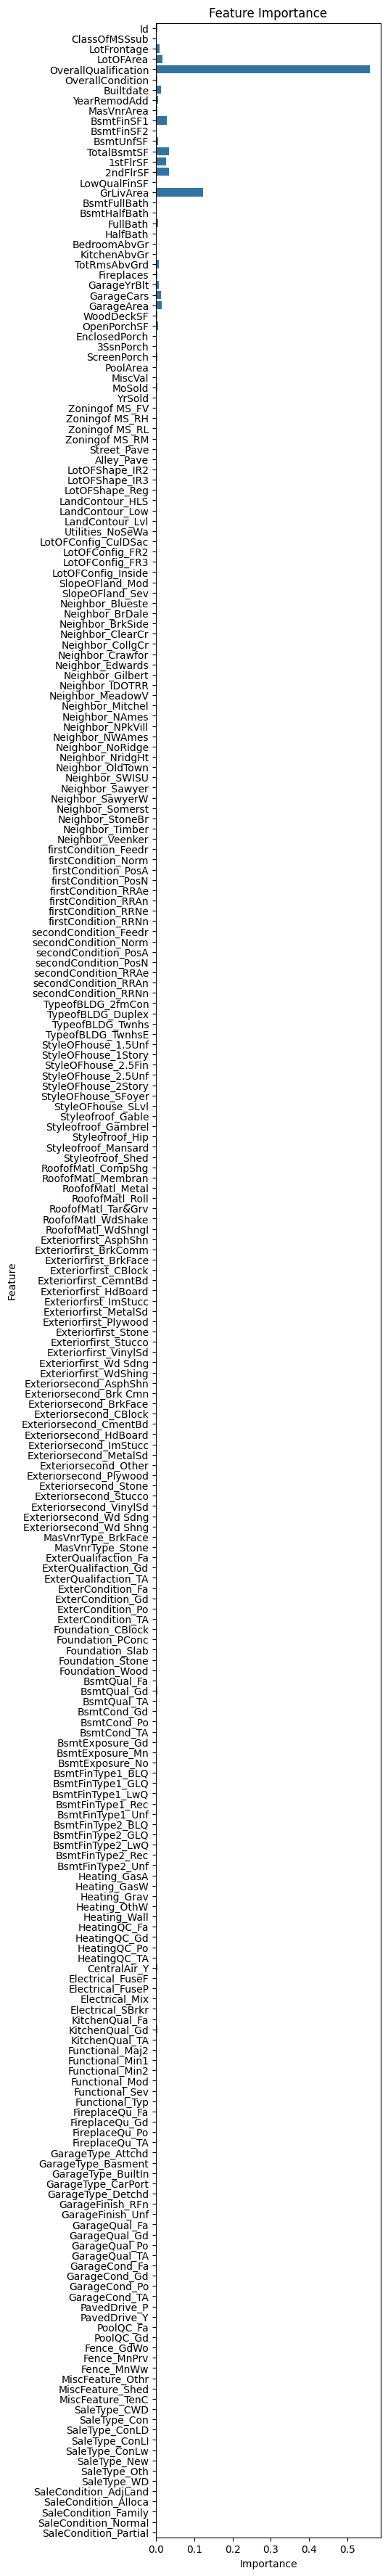

In [29]:
# Feature Importance
feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(4, 45))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [30]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns

In [31]:
print(numerical_features)

Index(['Id', 'ClassOfMSSsub', 'LotFrontage', 'LotOFArea',
       'OverallQualification', 'OverallCondition', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge'],
      dtype='object')


In [32]:
missing_numerical = df[numerical_features].isnull().sum()

In [33]:
missing_numerical = missing_numerical[missing_numerical > 0]
missing_numerical

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [34]:
df_cleaned = df.dropna(subset=missing_numerical.index)

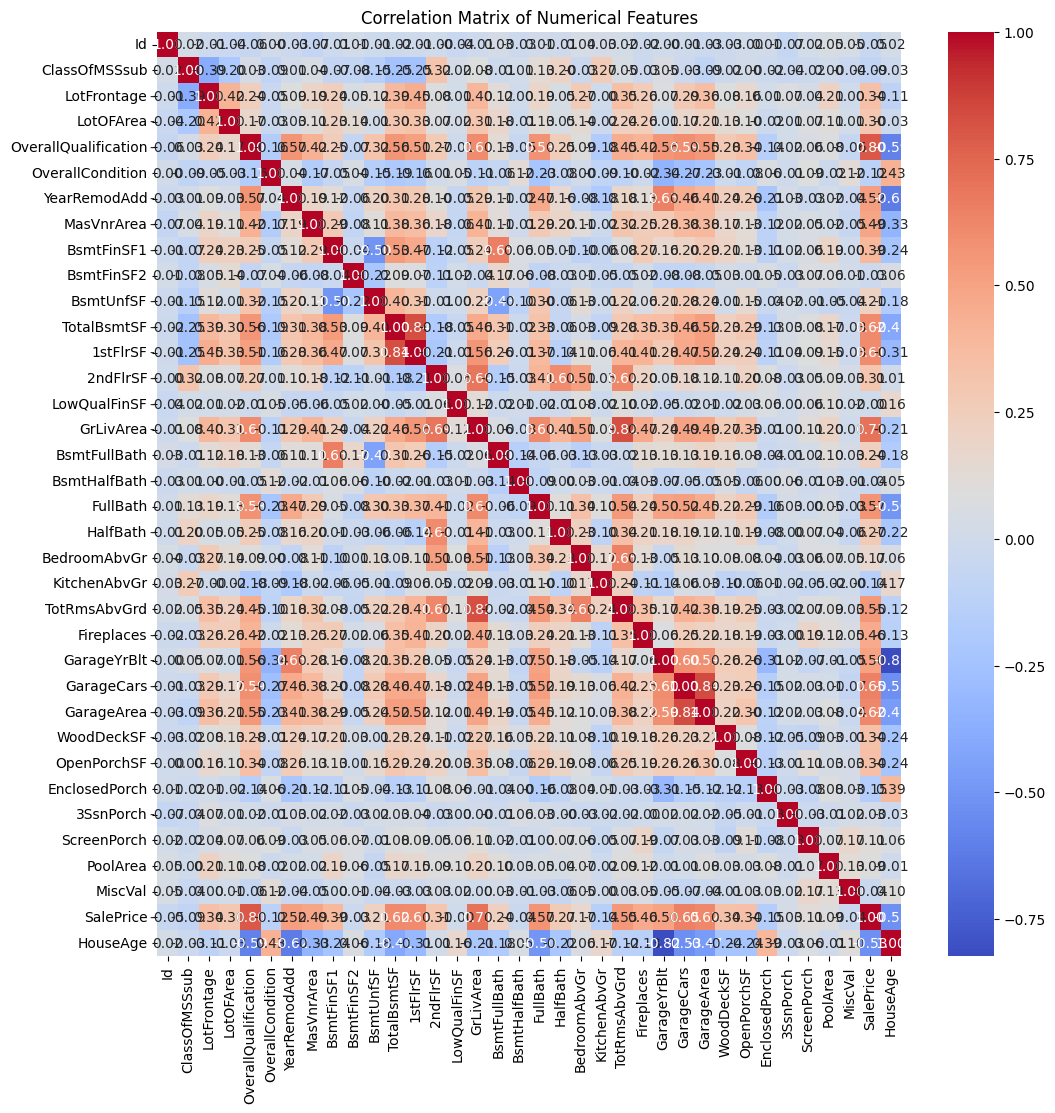

In [36]:
plt.figure(figsize=(12, 12))
corr_matrix = df_cleaned[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [37]:
corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_saleprice)

SalePrice               1.000000
OverallQualification    0.797881
GrLivArea               0.705154
GarageCars              0.647034
GarageArea              0.619330
TotalBsmtSF             0.615612
1stFlrSF                0.607969
FullBath                0.566627
TotRmsAbvGrd            0.547067
YearRemodAdd            0.521253
GarageYrBlt             0.504753
MasVnrArea              0.488658
Fireplaces              0.461873
BsmtFinSF1              0.390301
LotFrontage             0.344270
OpenPorchSF             0.343354
WoodDeckSF              0.336855
2ndFlrSF                0.306879
LotOFArea               0.299962
HalfBath                0.268560
BsmtFullBath            0.236737
BsmtUnfSF               0.213129
BedroomAbvGr            0.166814
ScreenPorch             0.110427
PoolArea                0.092488
3SsnPorch               0.030777
LowQualFinSF           -0.001482
BsmtFinSF2             -0.028021
MiscVal                -0.036041
BsmtHalfBath           -0.036513
Id        